In [1]:
import os
import sys
import numpy as np
import pandas as pd
import xarray as xr

import cartopy.feature as cf
import cartopy.crs as ccrs

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

sys.path.append(os.path.abspath("../../function"))
from others import normalize_series

In [2]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','ENSO')

## SOI

In [3]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
        'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

In [4]:
dir_file = os.path.join(dir_base,'raw','SOI_index.csv')
SOI = pd.read_csv(dir_file)
SOI = SOI[(SOI['YEAR'] >= 1980)&(SOI['YEAR'] <= 2024)]
SOI.head(3)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
29,1980,0.7,0.5,-0.7,-1.0,-0.0,-0.0,-0.1,0.6,-0.8,0.0,-0.6,-0.1
30,1981,0.6,-0.3,-2.1,-0.2,1.3,2.0,1.4,1.2,0.5,-0.6,0.3,0.8
31,1982,2.0,0.4,1.0,0.1,-0.6,-1.7,-2.5,-2.9,-2.9,-2.8,-4.3,-3.7


In [5]:
soi_series = SOI.set_index('YEAR').stack()
soi_series.index = pd.to_datetime(
    [f"{year}-{months.index(month)+1:02d}" for year, month in soi_series.index],
    format="%Y-%m")

## ONI

In [6]:
trimester = ['DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ',
        'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ']

In [7]:
dir_file = os.path.join(dir_base,'raw','ONI_index.csv')
ONI = pd.read_csv(dir_file)
ONI = ONI[(ONI['Year'] >= 1980)&(ONI['Year'] <= 2024)]
ONI.head(3)

,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
30,1980,0.6,0.5,0.3,0.4,0.5,0.5,0.3,0.0,-0.1,0.0,0.1,0.0
31,1981,-0.3,-0.5,-0.5,-0.4,-0.3,-0.3,-0.3,-0.2,-0.2,-0.1,-0.2,-0.1
32,1982,0.0,0.1,0.2,0.5,0.7,0.7,0.8,1.1,1.6,2.0,2.2,2.2


In [8]:
oni_series = ONI.set_index('Year').stack()
oni_series.index = pd.to_datetime(
    [f"{year}-{trimester.index(month)+1:02d}" for year, month in oni_series.index],
    format="%Y-%m")

## MEI

In [9]:
bimester = ['DJ', 'JF', 'FM', 'MA', 'AM', 'MJ',
        'JJ', 'JA', 'AS', 'SO', 'ON', 'ND']

In [10]:
dir_file = os.path.join(dir_base,'raw','MEI_index.csv')
MEI = pd.read_csv(dir_file)
MEI = MEI[(MEI['YEAR'] >= 1980)&(MEI['YEAR'] <= 2024)]
MEI.head(3)

,YEAR,DJ,JF,FM,MA,AM,MJ,JJ,JA,AS,SO,ON,ND
1,1980,0.33,0.20,0.39,0.51,0.45,0.55,0.47,0.03,0.12,0.02,-0.07,-0.12
2,1981,-0.36,-0.23,0.33,0.43,-0.24,-0.70,-0.61,-0.34,-0.07,-0.16,-0.27,-0.19
3,1982,-0.43,-0.49,-0.27,-0.36,-0.12,0.62,1.65,1.91,1.69,1.78,2.14,2.37


In [11]:
mei_series = MEI.set_index('YEAR').stack()
mei_series.index = pd.to_datetime(
    [f"{year}-{bimester.index(month)+1:02d}" for year, month in mei_series.index],
    format="%Y-%m")

In [12]:
len(soi_series),len(oni_series),len(mei_series)

(540, 540, 540)

In [13]:
ENSO = xr.Dataset(data_vars={"SOI": (("time"), soi_series.values),"ONI": (("time"), oni_series.values),"MEI": (("time"), mei_series.values)},
                    coords={'time': soi_series.index.values},
                    attrs=dict(description=f"Monthly ENSO index between 1951 and 2024",))

ENSO.SOI.attrs["units"] = "dimensionless"
ENSO.SOI.attrs["long_name"] = "Montlhy Southern Oscillation Indices"
ENSO.SOI.attrs["standard_name"] = "SOI"
ENSO.SOI.attrs["Description"] = "Normalized Sea-level atmospheric pressure difference between Tahiti and Darwin (Australia)."

ENSO.ONI.attrs["units"] = "Celsius (°C)"
ENSO.ONI.attrs["long_name"] = "NOAA Oceanic Niño Index"
ENSO.ONI.attrs["standard_name"] = "ONI"
ENSO.ONI.attrs["Description"] = "SST anomaly in the Niño 3.4 region, calculated as the 3-month running average."

ENSO.MEI.attrs["units"] = "dimensionless"
ENSO.MEI.attrs["long_name"] = "Multivariate ENSO Index Version 2 (MEI.v2)"
ENSO.MEI.attrs["standard_name"] = "MEI"
ENSO.MEI.attrs["Description"] = "The index is derived using extended empirical orthogonal function (EEOF) analysis that combines SLP, SST, UWND, VWND, and OLR."


In [14]:
ENSO

<xarray.Dataset> Size: 17kB
Dimensions:  (time: 540)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1980-01-01 1980-02-01 ... 2024-12-01
Data variables:
    SOI      (time) float64 4kB 0.7 0.5 -0.7 -1.0 -0.0 ... 1.5 -0.2 0.8 0.8 1.9
    ONI      (time) float64 4kB 0.6 0.5 0.3 0.4 0.5 ... -0.1 -0.2 -0.3 -0.4 -0.5
    MEI      (time) float64 4kB 0.33 0.2 0.39 0.51 ... -0.65 -0.52 -0.68 -0.91
Attributes:
    description:  Monthly ENSO index between 1951 and 2024

In [15]:
SOI_norm = normalize_series(ENSO.SOI)
ONI_norm = normalize_series(ENSO.ONI)
MEI_norm = normalize_series(ENSO.MEI)

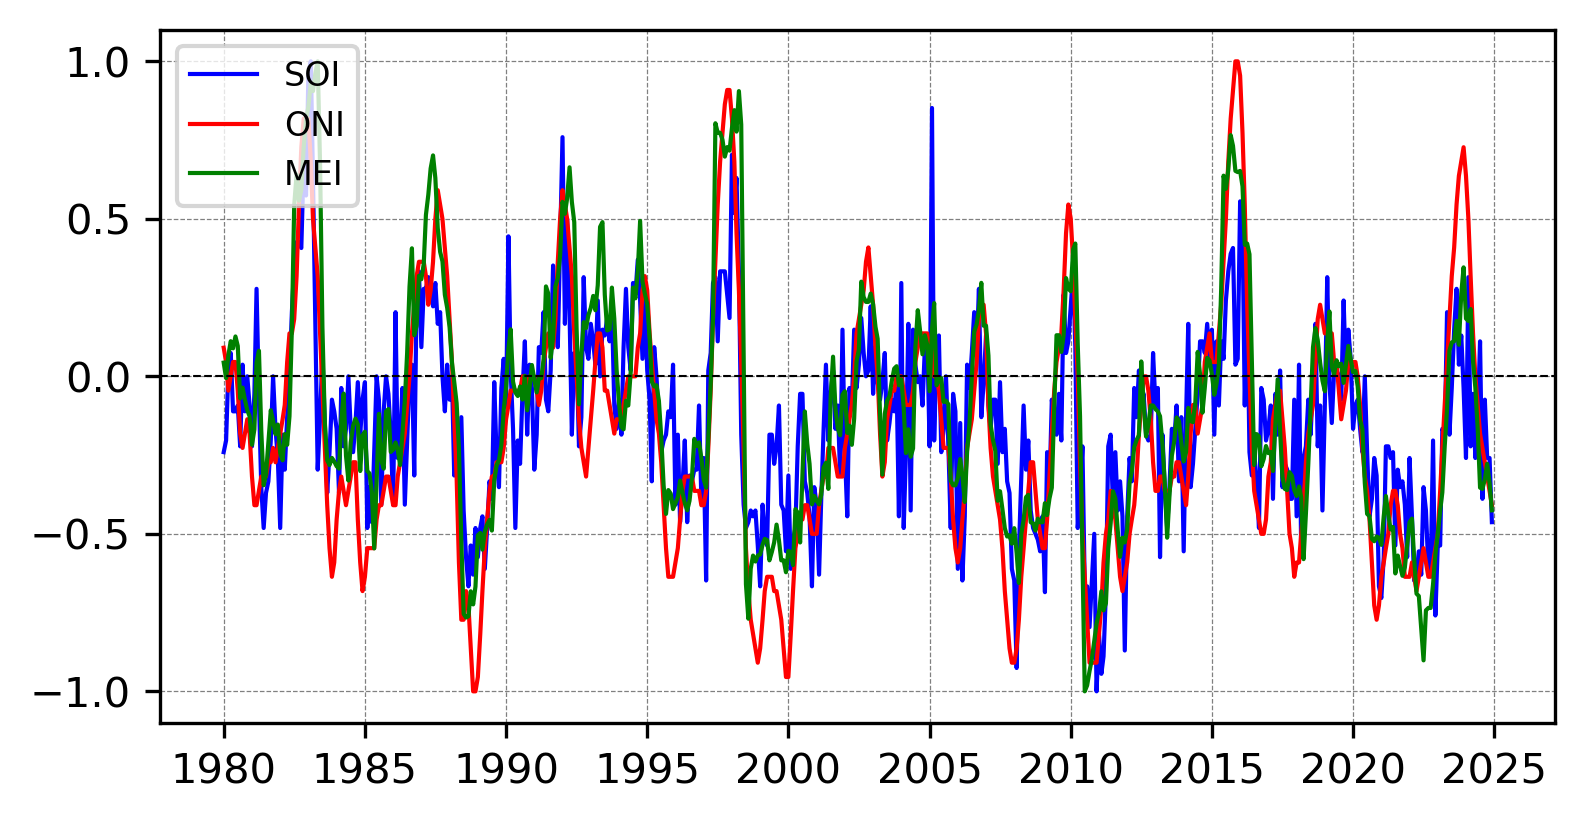

In [16]:
fig = plt.figure(figsize=(6,3),dpi=300)
gs = gridspec.GridSpec(1,1)

#==================================================================================================
ax1 = plt.subplot(gs[0, 0])
ax1.plot(ENSO.time.values, SOI_norm*-1, linewidth=1, color='blue', label='SOI')
ax1.plot(ENSO.time.values, ONI_norm, linewidth=1, color='red', label='ONI')
ax1.plot(ENSO.time.values, MEI_norm, linewidth=1, color='green', label='MEI')
ax1.legend(loc='upper left', fontsize=8)

ax1.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax1.grid(linewidth=0.3, linestyle='--', color='gray')